### Live_Day_1_EDA_&_Stock_Analysis_with_Time_Series_Data - iNeuron.ai

In [78]:
# !pip install pandas-datareader
# !pip install yfinance

In [79]:
# import required libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [80]:
# lets read tesla shares data
start_date = "2017-02-27"
end_date = "2022-02-25"

tesla = pdr.get_data_yahoo('TSLA', start=start_date, end=end_date)

# first five records
tesla.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [81]:
# last five records
tesla.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200


In [82]:
# Another option to get data

# tesla = yf.download('TSLA', start=start_date, end=end_date)
# tesla.head()

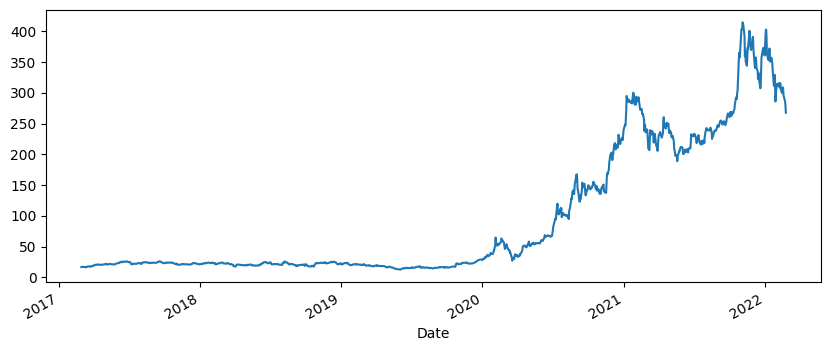

In [83]:
plt.figure(figsize=(10,4))
tesla['High'].plot()
plt.show()

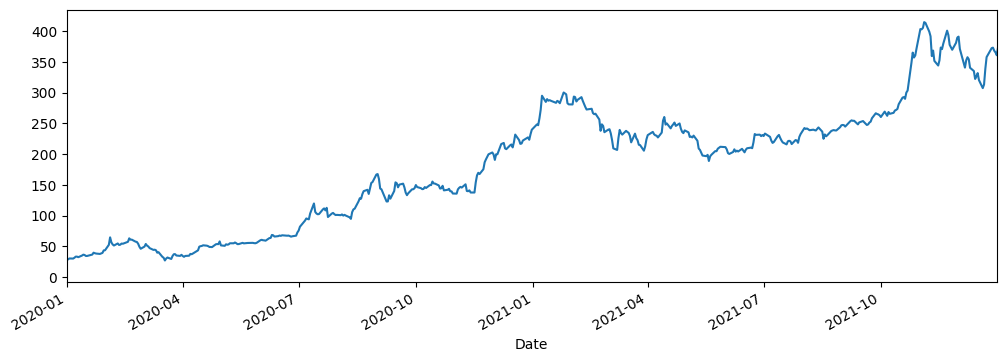

In [84]:
# xlimit 
plt.figure(figsize=(12,4))
tesla['High'].plot(xlim=['2020-01-01', '2021-12-31'])
plt.show()

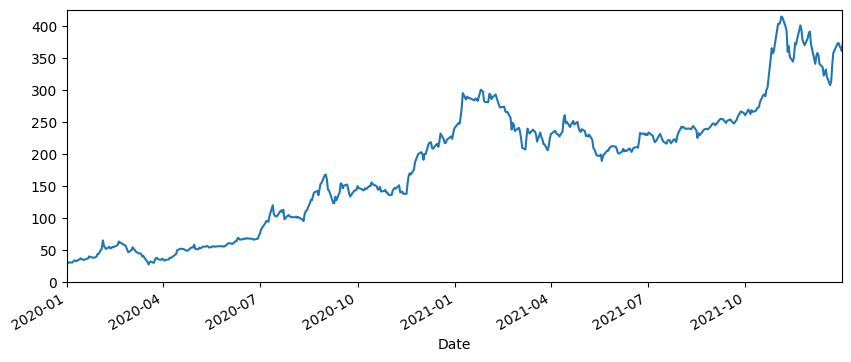

In [85]:
# x-limit and y-limit
plt.figure(figsize=(10,4))
tesla['High'].plot(xlim=['2020-01-01', '2021-12-31'], ylim=[0,425])
plt.show()

In [86]:
tesla.index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2022-02-10', '2022-02-11', '2022-02-14', '2022-02-15',
               '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-22',
               '2022-02-23', '2022-02-24'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [87]:
index = tesla.loc['2020-01-01':'2021-09-01'].index
share_open = tesla.loc['2020-01-01':'2021-09-01']['Open']

In [88]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [89]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

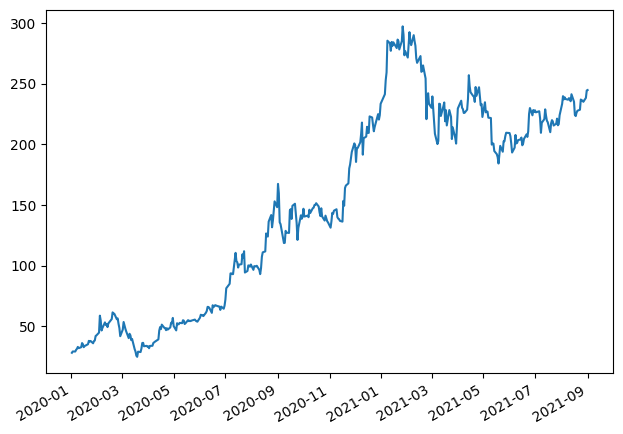

In [92]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [94]:
tesla = tesla.reset_index()

In [95]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [97]:
tesla = tesla.set_index('Date', drop=True)

In [98]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


### Time Resampling

In [99]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [102]:
# year end frequency
tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,16.279333,16.433332,16.134001,16.246000,16.246000,43791000
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,233.463333,267.493347,233.333328,254.679993,254.679993,50729100


<AxesSubplot:xlabel='Date'>

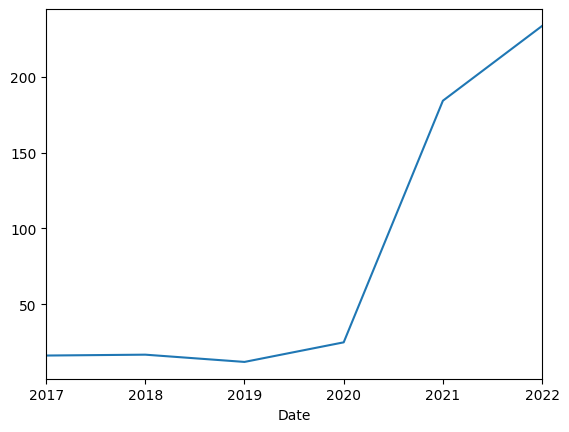

In [104]:
tesla.resample(rule='A').min()['Open'].plot()

In [105]:
# year end frequency
tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


<AxesSubplot:xlabel='Date'>

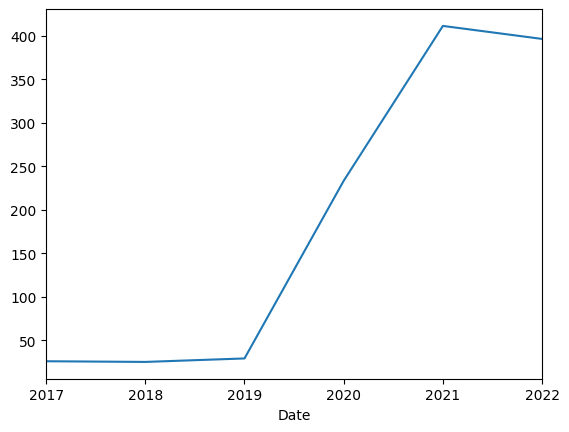

In [106]:
tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

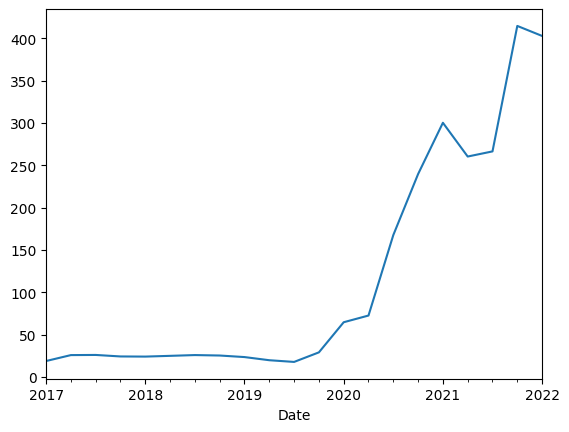

In [109]:
# quarterly start frequency
tesla.resample(rule='QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

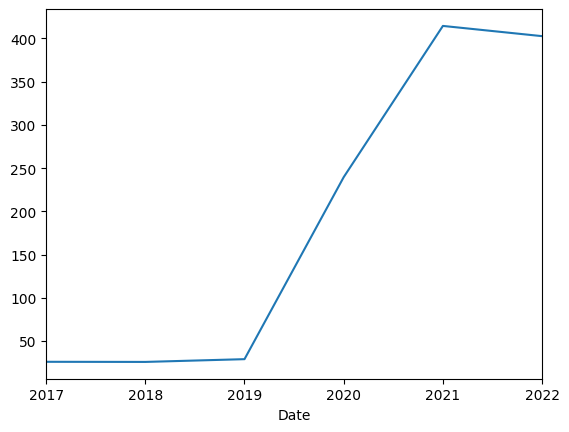

In [110]:
# business end frequency
tesla.resample(rule='BA').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

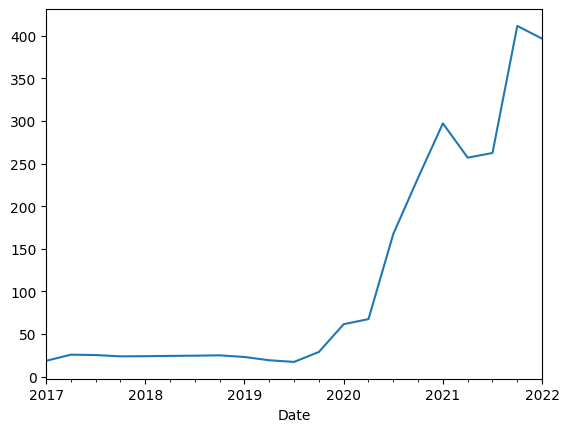

In [114]:
tesla.resample(rule='BQS').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

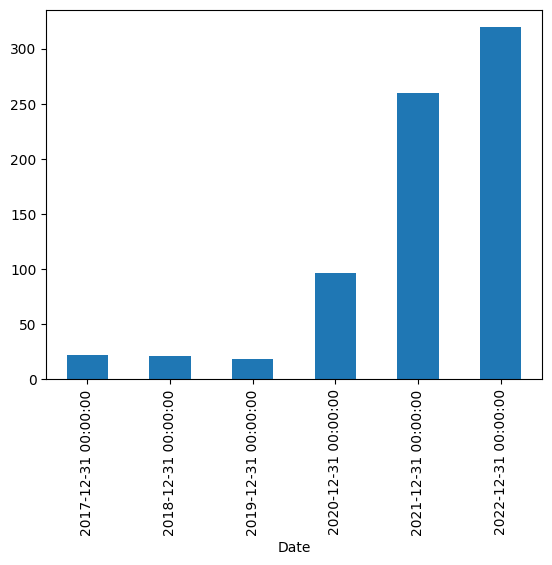

In [113]:
tesla['Open'].resample(rule='A').mean().plot(kind='bar')

In [116]:
tesla['High'].rolling(10).max().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    16.990000
2017-03-13    16.990000
2017-03-14    17.208000
2017-03-15    17.400000
2017-03-16    17.716667
2017-03-17    17.716667
2017-03-20    17.716667
2017-03-21    17.716667
2017-03-22    17.716667
2017-03-23    17.716667
2017-03-24    17.716667
Name: High, dtype: float64

In [117]:
tesla['Open: 30 days rolling'] = tesla['Open'].rolling(30).mean()

In [118]:
tesla.head(30)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000,NaN
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500,NaN
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500,NaN
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000,NaN
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000,NaN
2017-03-06,16.527332,16.780001,16.500668,16.747334,16.747334,50332500,NaN
2017-03-07,16.794666,16.926001,16.554667,16.572666,16.572666,51892500,NaN
2017-03-08,16.466667,16.671333,16.354668,16.458000,16.458000,55878000,NaN
2017-03-09,16.508667,16.577333,16.200001,16.326668,16.326668,58189500,NaN


<AxesSubplot:xlabel='Date'>

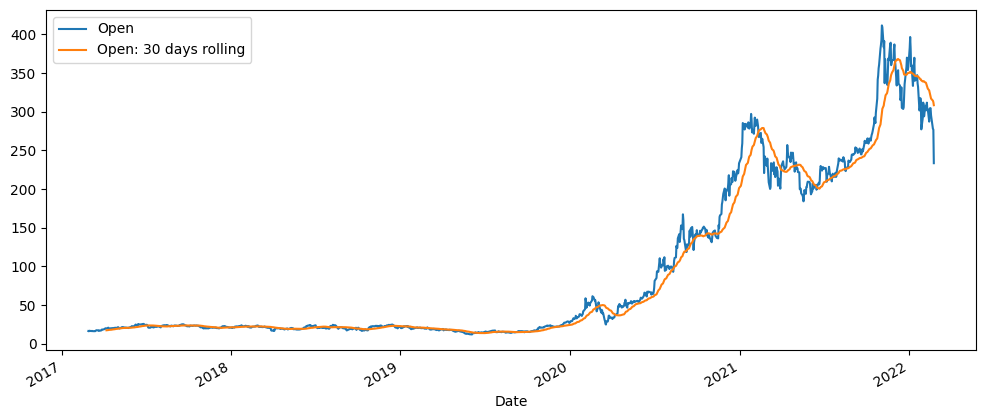

In [119]:
tesla[['Open', 'Open: 30 days rolling']].plot(figsize=(12,5))